## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,231.0,234.0,8.0,7.0,3.0,6.0,8.0,863.0,1496.0,4851.0
1,255.0,260.0,7.0,5.0,5.0,5.0,8.0,931.0,1438.0,4849.0
2,244.0,238.0,5.0,4.0,6.0,6.0,7.0,871.0,1412.0,4808.0
3,240.0,229.0,3.0,8.0,6.0,6.0,5.0,882.0,1413.0,4781.0
4,209.0,258.0,7.0,7.0,6.0,5.0,7.0,885.0,1353.0,4796.0


In [3]:
test_size = 4*24
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(904, 10)
(96, 10)


In [4]:
multi_ar_p = MultivariatePoissonAutorregresion(max_p=24,max_q=24)
multi_ar_p.fit(train_data, verbose=True)

Fitting model 0/9
Model fited with p = 1 and q = 1 returns a cv_score of 14219.008129262704
Model fited with p = 1 and q = 2 returns a cv_score of 13977.829323428614
Model fited with p = 1 and q = 3 returns a cv_score of 14891.261122337892
Model fited with p = 1 and q = 4 returns a cv_score of 14799.788849645614
Model fited with p = 1 and q = 5 returns a cv_score of 15716.742530400908
Model fited with p = 1 and q = 6 returns a cv_score of 21316.868569133465
Model fited with p = 1 and q = 7 returns a cv_score of 24108.515544041136
Model fited with p = 1 and q = 8 returns a cv_score of 23016.506808863
Model fited with p = 1 and q = 9 returns a cv_score of 32042.050100771063
Model fited with p = 1 and q = 10 returns a cv_score of 46244.94372630092
Model fited with p = 1 and q = 11 returns a cv_score of 44842.74292517149
Model fited with p = 1 and q = 12 returns a cv_score of 33016.424171557635
Model fited with p = 1 and q = 13 returns a cv_score of 31488.25565746778
Model fited with p = 1

time: 727m, 30.3s

In [5]:
fitted_values = multi_ar_p.fitted_values

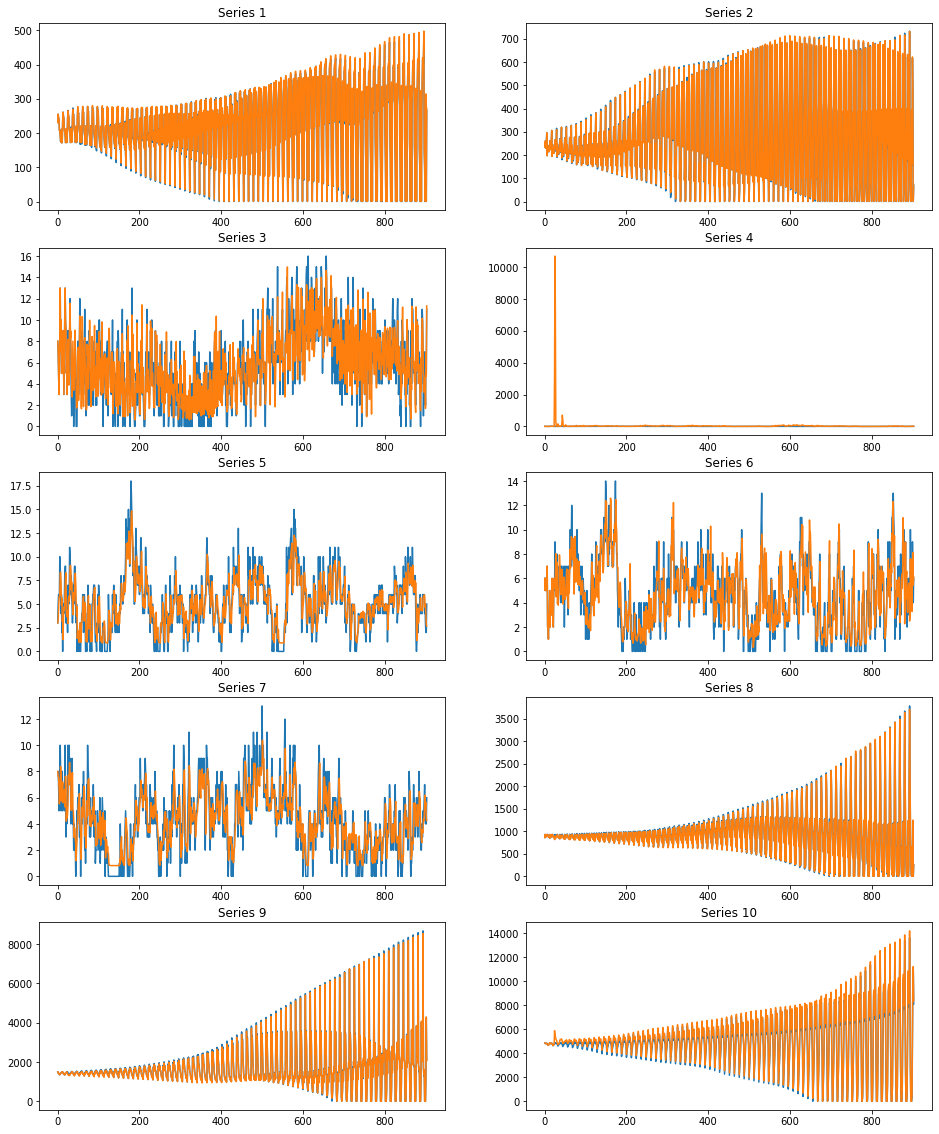

In [6]:
plot_fit(train_data, fitted_values, cols=2)

In [7]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)